# Clustering Assignment


## Clustering of Countries 

## Problem Statement - 
### HELP international NGO wants to spend their fund by choosing countries who are in direct need of aid. For this purpose we need to cluster countries based on data which contains various factors by which these countries can be clustered such as (child_mort, exports, health, imports, income, inflation, life_expec,	total_fer,	gdpp)

#### Steps of the assignment are classified as below-
1. Data Understanding 
2. Data Cleaning and Visualisation
3. Data Preparation
4. Model Building
5. Final analysis

In [1]:
# filter warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
#import all the necessary libraries

import pandas as pd
import numpy as np

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To Scale our data
from sklearn.preprocessing import StandardScaler

# To perform KMeans clustering 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

## 1. Data Understanding

In [3]:
# Read the data set

countries_df = pd.read_csv(r'Country-data.csv')
countries_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
# Counting number of rows and columns

countries_df.shape

(167, 10)

In [5]:
# Decribing stats

countries_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [6]:
# Looking for datatype and null values

countries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


In [7]:
#basic data cleaning checks

countries_df.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

**Thus we can conclude that there are no null values in the data.**

## 2. Data Cleaning and Visualisation

Let's convert imports,exports and health spending from  percentage values to actual values of their GDP per capita
because the percentage values don't give a clear picture of that country. 


In [8]:
#Converting exports,imports and health spending percentages to absolute values.

countries_df['exports'] = countries_df['exports']*countries_df['gdpp']/100
countries_df['imports'] = countries_df['imports']*countries_df['gdpp']/100
countries_df['health'] = countries_df['health']*countries_df['gdpp']/100

In [9]:
countries_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


### Let's plot the correlation matrix and check if the data is indeed highly correlated

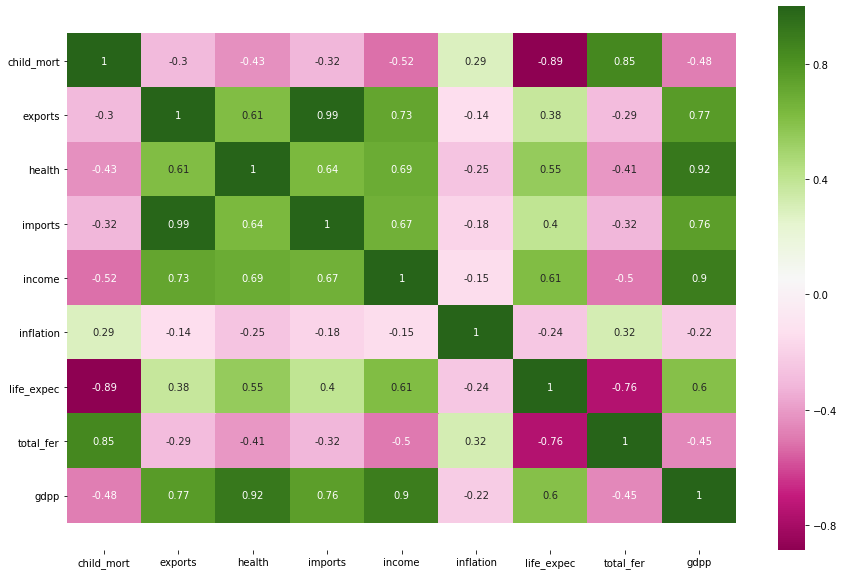

In [10]:
plt.figure(figsize = (15, 10))
sns.heatmap(countries_df.corr(), annot = True, cmap = 'PiYG')
plt.xticks(rotation=0)
plt.yticks(rotation=0)

b,t = plt.ylim()
b += 0.5
t -= 0.5
plt.ylim(b, t)

plt.show()

**Inferences**

1) It is obvious that 'health', 'income' are highly correlated with 'gdpp'. That means countries having more net income per person have more gdpp, also total health spending per capita is directly proportional to gdpp.

2) Child mortality rate increase as total fertality rate increases as they are positively correlated.

3) On other hand (total fertality, child mortality) rate of a country decrease as (gdpp, income) of a country increases as they are negatively correlated

4) Life expectancy increases as (total fertality, child mortality) rate of a country decreases

5) Imports and exports are highly correlated. More the imports more the exports of country.

6) 'Health', 'Income', 'gdpp' shows high negative correlation with child mortality.


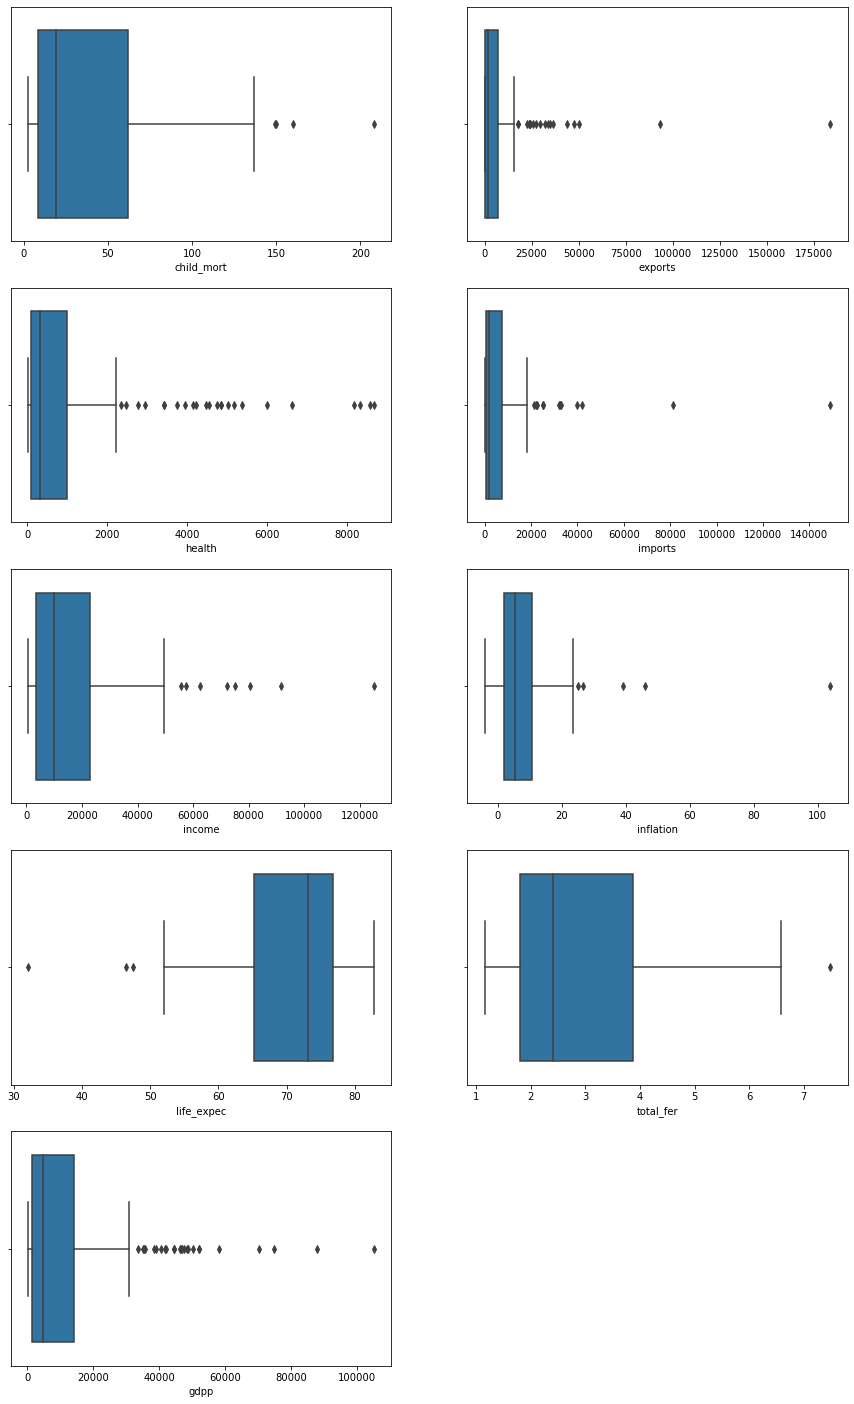

In [11]:
# Outliers Check

variables = ['child_mort', 'exports', 'health', 'imports', 'income','inflation', 'life_expec', 'total_fer', 'gdpp']
plt.figure(figsize = (15, 25))
for i in enumerate(variables):
    plt.subplot(5, 2, i[0]+1)
    sns.boxplot(countries_df[i[1]])

**Inferences**
- As you can see there are so many outliers in almost all the variables, so it is necessary to cap them.
- Also, we shouldn't cap data at lower fence except the child_mort and inflation.
- Only life expectancy has outliers on lower fence that we can't cap as we may end up loosing some countries are are actually in   the need of AID.
- For child_mort and inflation, we shouldn't cap or drop the outliers at the upper range.
- For all other variables we will cap outliers from higher fence.

## 3. Data Preparation

In [12]:
# capping outliers for 'exports'
q4 = countries_df['exports'].quantile(0.95)
countries_df['exports'][countries_df['exports']>=q4]=q4

# capping outliers for 'health'
q4 = countries_df['health'].quantile(0.95)
countries_df['health'][countries_df['health']>=q4]=q4

# capping outliers for 'imports'
q4 = countries_df['imports'].quantile(0.95)
countries_df['imports'][countries_df['imports']>=q4]=q4

# capping outliers for 'income'
q4 = countries_df['income'].quantile(0.95)
countries_df['income'][countries_df['income']>=q4]=q4

# capping outliers for 'life_expec'
q4 = countries_df['life_expec'].quantile(0.95)
countries_df['life_expec'][countries_df['life_expec']>=q4]=q4

# capping outliers for 'total_fer'
q4 = countries_df['total_fer'].quantile(0.95)
countries_df['total_fer'][countries_df['total_fer']>=q4]=q4

# capping outliers for 'gdpp'
q4 = countries_df['gdpp'].quantile(0.95)
countries_df['gdpp'][countries_df['gdpp']>=q4]=q4


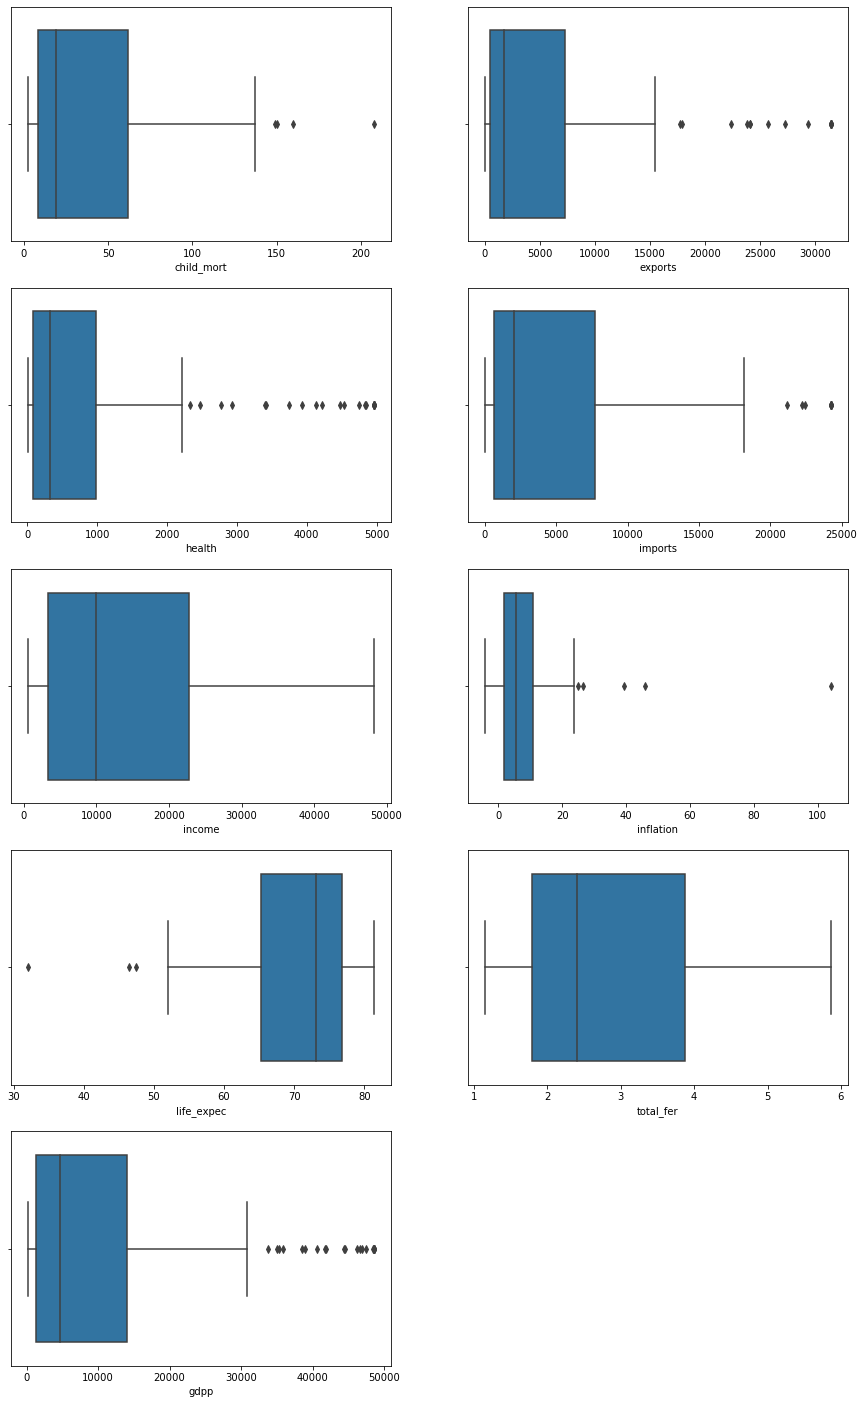

In [13]:
# checking for outliers again 

plt.figure(figsize = (15, 25))
for i in enumerate(variables):
    plt.subplot(5, 2, i[0]+1)
    sns.boxplot(countries_df[i[1]])

**Inferences**
- Still there are some outliers in data, but we will keep it because if we remove them then we will lose important part of data

## Clustering

### Scaling of variables

In [14]:
countries_df.shape

(167, 10)

In [15]:
countries_df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [16]:
# Using StandardScaler

# Rescaling

clust_df = countries_df[['child_mort', 'exports', 'health', 'imports', 'income','inflation', 'life_expec', 'total_fer', 'gdpp']]

# Instantiate

Scaler = StandardScaler()

# fit_transform

countries_scaled = Scaler.fit_transform(clust_df)
countries_scaled.shape

(167, 9)

In [17]:
countries_scaled = pd.DataFrame(countries_scaled)
countries_scaled.columns = ['child_mort', 'exports', 'health', 'imports', 'income','inflation', 'life_expec', 'total_fer', 'gdpp']
countries_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.669581,-0.629435,-0.732729,-0.958349,0.157336,-1.623180,2.016421,-0.757362
1,-0.538949,-0.542172,-0.473489,-0.472182,-0.394006,-0.312347,0.654823,-0.880535,-0.523321
2,-0.272833,-0.475838,-0.530017,-0.560152,-0.192552,0.789274,0.677490,-0.019090,-0.498838
3,2.007808,-0.418960,-0.588935,-0.543087,-0.667360,1.387054,-1.181180,2.044904,-0.560376
4,-0.695634,-0.027134,-0.150685,0.306422,0.227992,-0.601749,0.711490,-0.547072,0.013312


### Hopskins score to check clustering tendency

Let's proceed to calculating the Hopkins statistic to ensure that the data is good for clustering.

In [18]:
#Calculating the Hopkins statistic

from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [19]:
#Let's check the Hopkins measure

hopkins(countries_scaled)

0.8688858736925581

***Since Hopkins score > 0.5. Hence the data is suitable for clustering. Preliminary check is now done.***

## 4. Model Buliding

### Method 1: K-means clustering

#### Finding optimum number of clusters using:
#### 1.1. Elbow curve method

##### Let's use the elbow curve method to identify the ideal number of clusters.

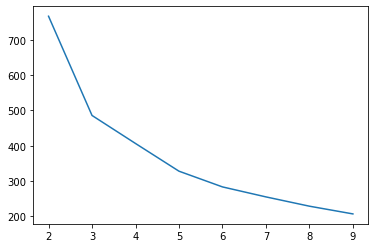

In [20]:
# SSD - sum of squared distances

ss = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters = k).fit(countries_scaled)
    ss.append([k, kmeans.inertia_ ])
    
plt.plot(pd.DataFrame(ss)[0], pd.DataFrame(ss)[1])

***The elbow curve above indicates that 3 might be the ideal number of clusters. let's confirm it again by using silhouette score method also***

#### 1.2. Silhouette Analysis


For n_clusters=2, the silhouette score is 0.49332771241764917
For n_clusters=3, the silhouette score is 0.43364324781598373
For n_clusters=4, the silhouette score is 0.4044723482684472
For n_clusters=5, the silhouette score is 0.36735753324234866
For n_clusters=6, the silhouette score is 0.32056206431777823
For n_clusters=7, the silhouette score is 0.266252827977579
For n_clusters=8, the silhouette score is 0.2996301276749963


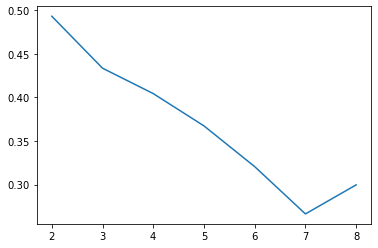

In [21]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
ss = []

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(countries_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(countries_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    ss.append([num_clusters, silhouette_score(countries_scaled, kmeans.labels_)])
    
temp = pd.DataFrame(ss)    
plt.plot(temp[0], temp[1])

**Here silhoutte score for 2 cluster is highest but as per business aspect creating 2 clusters is not a good idea, 
although silhoutte score for 4 cluster is second highest but we will go with 3 clusters as number of optimum cluster obtained from elbow curve method is also 3.**

### Building model with 3 clusters

In [22]:
# Let's finally create the clusters 
# final model with k=3

kmeans = KMeans(n_clusters=3, max_iter=50 , random_state = 50)
kmeans.fit(countries_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=50, tol=0.0001, verbose=0)

In [23]:
kmeans.labels_

array([2, 0, 0, 2, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 2,
       0, 1, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 1, 1,
       1, 0, 0, 0, 0, 2, 2, 0, 0, 1, 1, 2, 2, 0, 1, 2, 1, 0, 0, 2, 2, 0,
       2, 0, 1, 0, 0, 0, 2, 1, 1, 1, 0, 1, 0, 0, 2, 2, 1, 0, 2, 0, 0, 2,
       2, 0, 0, 1, 0, 2, 2, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       1, 1, 2, 2, 1, 0, 2, 0, 0, 0, 0, 0, 1, 1, 0, 0, 2, 0, 0, 2, 0, 0,
       2, 1, 1, 1, 2, 2, 1, 1, 0, 0, 2, 0, 1, 1, 0, 2, 0, 2, 2, 0, 0, 0,
       0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2], dtype=int32)

In [24]:
label  = pd.DataFrame(kmeans.labels_, columns= ['label'])
label.head()

,label
0,2
1,0
2,0
3,2
4,0


In [25]:
countries_KM = countries_df.copy()

In [26]:
countries_KM = pd.concat([countries_KM, label], axis =1)
countries_KM.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.820,553,2
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.650,4090,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.890,4460,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,5.861,3530,2
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.130,12200,0


## 5. Final analysis using K-Means

In [27]:
countries_KM['label'].value_counts()

0    82
2    48
1    37
Name: label, dtype: int64

***Each cluster has a good number of countries associated with it.***

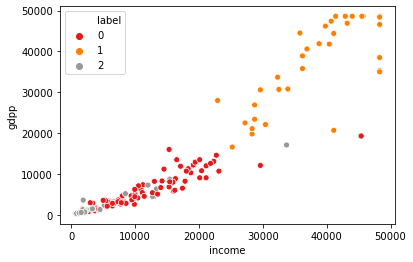

In [28]:
sns.scatterplot(x = "income" , y = "gdpp", hue = 'label', data = countries_KM, palette = "Set1")

- so for cluster with label 2 falls under low income and low gdpp rate

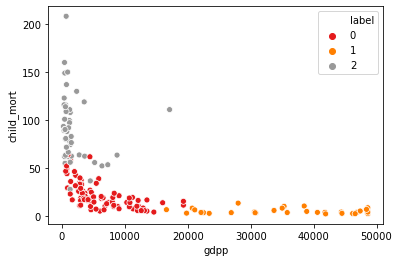

In [29]:
sns.scatterplot(x = "gdpp" , y = "child_mort", hue = 'label', data = countries_KM, palette = "Set1")

- cluster with label 2 has high child mortality rate for low gdpp

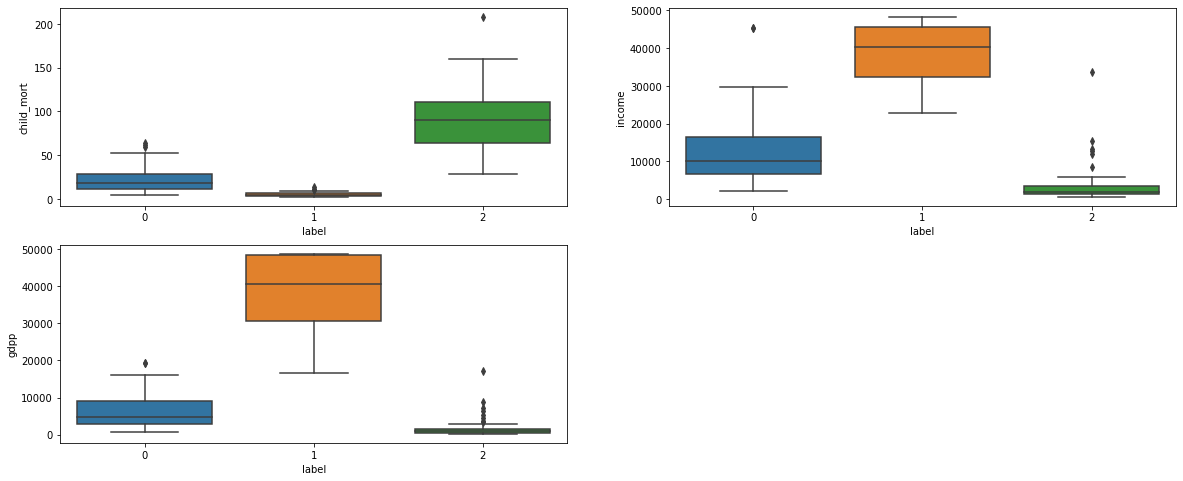

In [30]:
#Let's do some visualizations.

plt.figure(figsize = (20,8))
plt.subplot(2,2,1)
sns.boxplot(x= 'label', y= 'child_mort', data= countries_KM)
plt.subplot(2,2,2)
sns.boxplot(x= 'label', y= 'income', data= countries_KM)
plt.subplot(2,2,3)
sns.boxplot(x= 'label', y= 'gdpp', data= countries_KM)
plt.show()

***Inferences***

- **Cluster group with label 2 has low gdpp, low income and high child mortality rate. So this is a group of countries we really need to target.**
- On the other hand cluster group with label 1 has high income, high gdpp and low child mortality rate so this is a wealthy group of countries we can say.

## Cluster Profiling

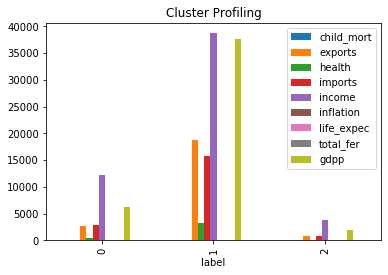

In [31]:
# Making sense out of the clsuters

countries_KM.drop('country', axis = 1).groupby('label').mean().plot(kind = 'bar', title = 'Cluster Profiling')

**Inferences**
- Cluster group with label 2 has low value for most of the columns but here it's not much clear so will consider only gdpp, income and child mortality rate for profiling. 

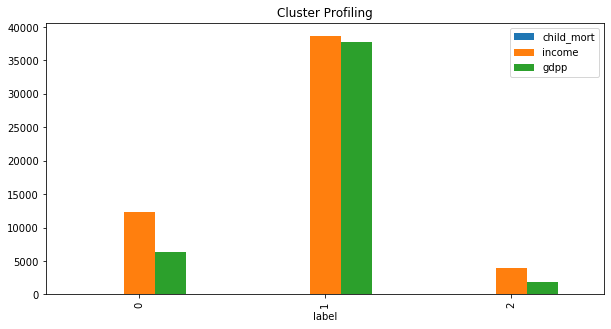

In [52]:
# GDP, INCOME AND CHID_MORT

countries_KM.drop(['country', 'exports', 'health', 'imports', 'inflation', 'life_expec', 'total_fer'], axis = 1).groupby('label').mean().plot(kind = 'bar' ,title = 'Cluster Profiling', figsize=(10,5))

**Inferences**
- Cluster group with label 2 has low gdpp, low income and high child mortality rate.

In [33]:
# sorting top 10 countries with low gdpp, high child_mort, low income

List_1 = countries_KM.loc[countries_KM['label']==2].sort_values(by=['gdpp', 'child_mort', 'income'], ascending = [True, False, True])
List_1.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.30,57.7,5.861,231,2
88,Liberia,89.3,62.4570,38.5860,302.802,700.0,5.47,60.8,5.020,327,2
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609.0,20.80,57.5,5.861,334,2
112,Niger,123.0,77.2560,17.9568,170.868,814.0,2.55,58.8,5.861,348,2
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220.0,17.20,55.0,5.200,399,2
93,Madagascar,62.2,103.2500,15.5701,177.590,1390.0,8.79,60.8,4.600,413,2
106,Mozambique,101.0,131.9850,21.8299,193.578,918.0,7.64,54.5,5.560,419,2
31,Central African Republic,149.0,52.6280,17.7508,118.190,888.0,2.01,47.5,5.210,446,2
94,Malawi,90.5,104.6520,30.2481,160.191,1030.0,12.10,53.1,5.310,459,2
50,Eritrea,55.2,23.0878,12.8212,112.306,1420.0,11.60,61.7,4.610,482,2


### Final list of countries with K-Means clustering

In [34]:
List_KM = pd.DataFrame()
List_KM['Country'] = List_1.country.values
List_KM.index = np.arange(1, len(List_KM) + 1)
List_KM

,Country
1,Burundi
2,Liberia
3,"Congo, Dem. Rep."
4,Niger
5,Sierra Leone
6,Madagascar
7,Mozambique
8,Central African Republic
9,Malawi
10,Eritrea


### Method 2 - Hierachical Clustering

In [35]:
#Let's try hierarchical clustering

countries_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.669581,-0.629435,-0.732729,-0.958349,0.157336,-1.623180,2.016421,-0.757362
1,-0.538949,-0.542172,-0.473489,-0.472182,-0.394006,-0.312347,0.654823,-0.880535,-0.523321
2,-0.272833,-0.475838,-0.530017,-0.560152,-0.192552,0.789274,0.677490,-0.019090,-0.498838
3,2.007808,-0.418960,-0.588935,-0.543087,-0.667360,1.387054,-1.181180,2.044904,-0.560376
4,-0.695634,-0.027134,-0.150685,0.306422,0.227992,-0.601749,0.711490,-0.547072,0.013312


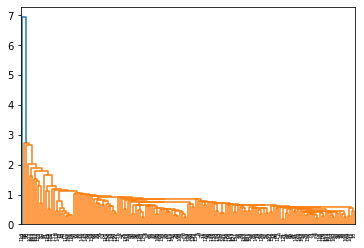

In [36]:
# single linkage method

Linkage_1 = linkage(countries_scaled, method = 'single', metric= 'euclidean')
dendrogram(Linkage_1)
plt.show()

**From single linkage we are not able to make strong prediction for number of clusters, so we will now go with complete linkage method.**

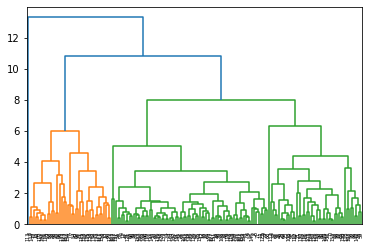

In [37]:
# complete linkage

Linkage_2 = linkage(countries_scaled, method = 'complete', metric = 'euclidean')
dendrogram(Linkage_2)
plt.show()

**Complete linkage gives clear dendrogram. We can cut this dendrogram at height 6 to get 4 clusters.**


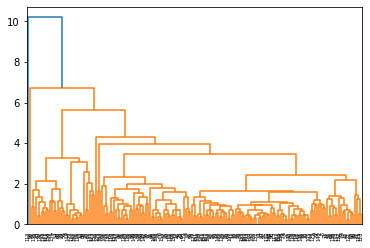

In [38]:
# average linkage

Linkage_3 = linkage(countries_scaled, method = 'average', metric = 'euclidean')
dendrogram(Linkage_3)
plt.show()

**Average linkage method also gives us better results, but this method creates time complexity. Also complete linkage is giving better results**

In [39]:
cluster_id = cut_tree(Linkage_2, n_clusters =4).reshape(-1, )
cluster_id

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0,
       1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 2, 2,
       2, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 0, 1, 2, 0, 2, 1, 1, 0, 0, 1,
       0, 1, 2, 1, 1, 1, 0, 2, 2, 2, 1, 2, 1, 1, 0, 0, 2, 1, 0, 1, 1, 0,
       0, 2, 1, 2, 1, 0, 0, 2, 1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       2, 2, 0, 3, 2, 2, 0, 1, 1, 1, 1, 1, 2, 2, 1, 1, 0, 1, 2, 0, 1, 1,
       0, 2, 2, 2, 0, 0, 2, 2, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0])

In [40]:
countries_H = countries_df.copy()

In [41]:
countries_H['cluster_id'] = cluster_id
countries_H.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.820,553,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.650,4090,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.890,4460,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,5.861,3530,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.130,12200,1


## 5. Final analysis using Hierarchical

In [42]:
countries_H.cluster_id.value_counts()

1    78
0    47
2    41
3     1
Name: cluster_id, dtype: int64

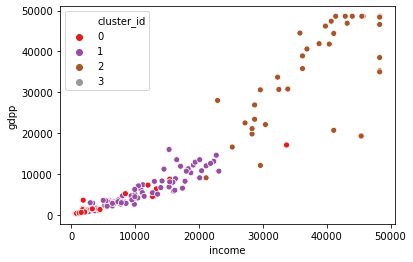

In [43]:
sns.scatterplot(x = "income" , y = "gdpp", hue = 'cluster_id', data = countries_H, palette = "Set1")

- Cluster group with label 0 has low income and low gdpp rate

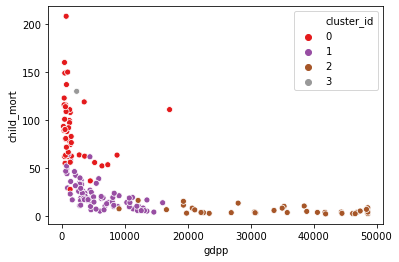

In [44]:
sns.scatterplot(x = "gdpp" , y = "child_mort", hue = 'cluster_id', data = countries_H, palette = "Set1")

- Cluster group with label 0 and 1 have high child mortality rate for low gdpp

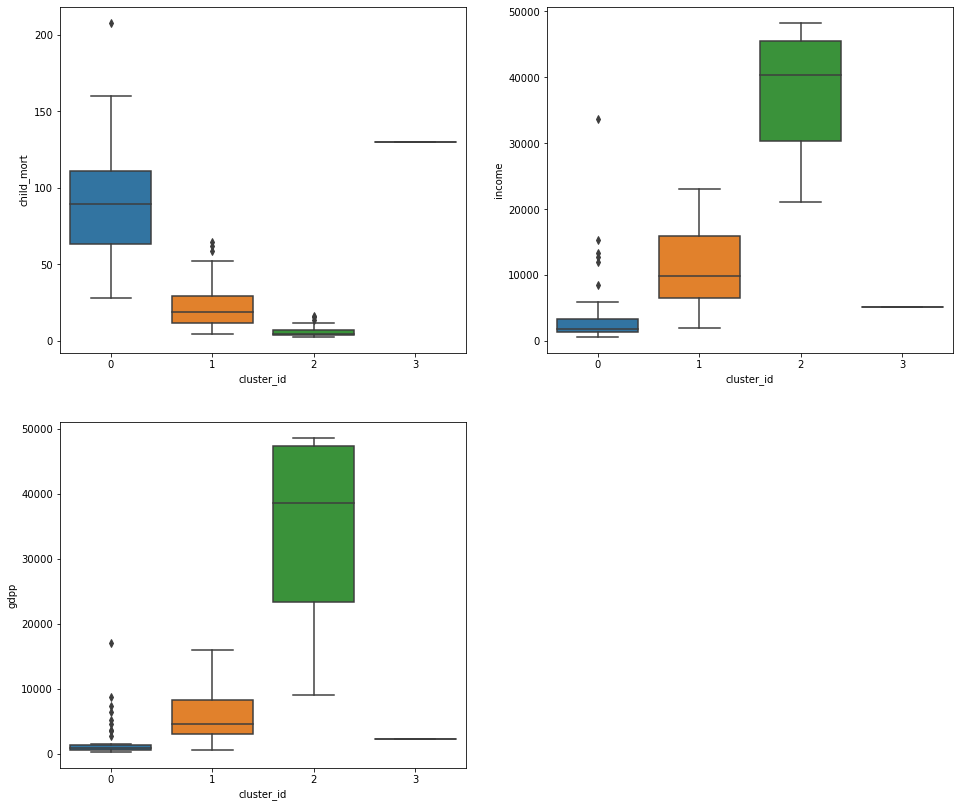

In [45]:
plt.figure(figsize = (16,14))
plt.subplot(2,2,1)
sns.boxplot(x= 'cluster_id', y= 'child_mort', data= countries_H)
plt.subplot(2,2,2)
sns.boxplot(x= 'cluster_id', y= 'income', data= countries_H)
plt.subplot(2,2,3)
sns.boxplot(x= 'cluster_id', y= 'gdpp', data= countries_H)
plt.show()

- **Cluster group with label 3 has low gdpp, low income and high child mortality rate. So this is a group of countries we really need to target.**
- On the other hand cluster group with label 2 has high income, high gdpp and low child mortality rate so this is a wealthy group of countries we can say.

## Cluster Profiling

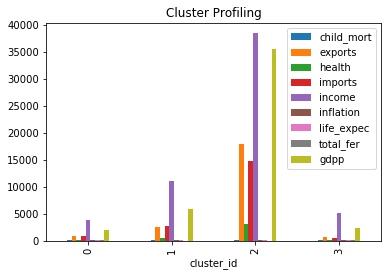

In [46]:
# Making sense out of the clsuters

countries_H.drop('country', axis = 1).groupby('cluster_id').mean().plot(kind = 'bar', title = 'Cluster Profiling')

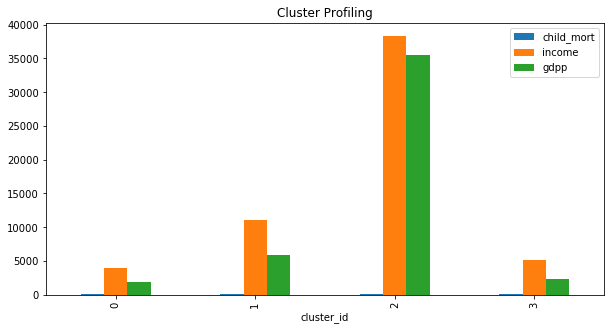

In [47]:
# GDP, INCOME AND CHID_MORT

countries_H.drop(['country', 'exports', 'health', 'imports', 'inflation', 'life_expec', 'total_fer'], axis = 1).groupby('cluster_id').mean().plot(kind = 'bar', title = 'Cluster Profiling', figsize=(10,5))

**Inferences**
Cluster group with label 0 has low gdpp, low income and high child mortality rate. 

In [48]:
# sorting top 10 countries with low gdpp, high child_mort, low income

List_2 = countries_H.loc[(countries_H.cluster_id == 0 )].sort_values(by = ['gdpp', 'child_mort', 'income'], ascending = [True, False, True])

List_2.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.30,57.7,5.861,231,0
88,Liberia,89.3,62.4570,38.5860,302.802,700.0,5.47,60.8,5.020,327,0
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609.0,20.80,57.5,5.861,334,0
112,Niger,123.0,77.2560,17.9568,170.868,814.0,2.55,58.8,5.861,348,0
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220.0,17.20,55.0,5.200,399,0
93,Madagascar,62.2,103.2500,15.5701,177.590,1390.0,8.79,60.8,4.600,413,0
106,Mozambique,101.0,131.9850,21.8299,193.578,918.0,7.64,54.5,5.560,419,0
31,Central African Republic,149.0,52.6280,17.7508,118.190,888.0,2.01,47.5,5.210,446,0
94,Malawi,90.5,104.6520,30.2481,160.191,1030.0,12.10,53.1,5.310,459,0
50,Eritrea,55.2,23.0878,12.8212,112.306,1420.0,11.60,61.7,4.610,482,0


### Final list of countries with Hierarchical clustering


In [49]:
List_H = pd.DataFrame()
List_H['Country'] = List_2.country.values
List_H.index = np.arange(1, len(List_H) + 1)
List_H

,Country
1,Burundi
2,Liberia
3,"Congo, Dem. Rep."
4,Niger
5,Sierra Leone
6,Madagascar
7,Mozambique
8,Central African Republic
9,Malawi
10,Eritrea


### Top 10 needfull countries for AID as per K-Means clustering :

In [50]:
List_KM.head(10)

,Country
1,Burundi
2,Liberia
3,"Congo, Dem. Rep."
4,Niger
5,Sierra Leone
6,Madagascar
7,Mozambique
8,Central African Republic
9,Malawi
10,Eritrea


### Top 10 needfull countries for AID as per Hierarchical clustering :

In [51]:
List_H.head(10)

,Country
1,Burundi
2,Liberia
3,"Congo, Dem. Rep."
4,Niger
5,Sierra Leone
6,Madagascar
7,Mozambique
8,Central African Republic
9,Malawi
10,Eritrea


**Thus, the top 10 needfull countries for AID are being predicted same using both K-Means and Hierarchical method.**